# Tosha Khana Data Analysis

This notebook analyzes the Tosha Khana dataset, which contains records of gifts received by public officials. The goal is to explore patterns in gift types, recipients, valuation, and compliance over time.


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## 1. Data Loading and Initial Inspection

Load the dataset and perform basic checks on its structure and content. This includes viewing column names, data types, null values, and sample entries.


In [236]:
df=pd.read_csv(r'D:\machine learning contents\datasets\Refined_TK_data ver 2.csv')

In [237]:
df.head(5)


,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
0,Two small silver\nBowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharrafarraf,1/8/2002,5000.0,0.0,Yes,Yes
1,One Pilot Pen with\nink,Pen,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,1/8/2002,3500.0,0.0,Yes,Yes
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen. Musharraf,1/9/2002,7500.0,0.0,Yes,Yes
3,One (decoration)\nfolding Screen,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nAf...",Gen. Musharraf,1/15/2002,2200.0,0.0,Yes,Yes
4,One Decoration\nPiece,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,1/22/2002,2000.0,0.0,Yes,Yes


In [238]:
df.shape
old_rows=len(df)

##  Dataset Overview

Understand the size and structure of the dataset using shape, dtypes, and info methods.


In [239]:
df.dtypes

Detail of Gifts       object
Item Category         object
Name of Recipient     object
Affiliation           object
Date                  object
Assessed Value       float64
Retention Cost       float64
Retained              object
Remarks               object
dtype: object

In [240]:
df.columns

Index(['Detail of Gifts', 'Item Category', 'Name of Recipient', 'Affiliation',
       'Date', 'Assessed Value', 'Retention Cost', 'Retained', 'Remarks'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Detail of Gifts    4208 non-null   object 
 1   Item Category      2338 non-null   object 
 2   Name of Recipient  4214 non-null   object 
 3   Affiliation        3207 non-null   object 
 4   Date               4211 non-null   object 
 5   Assessed Value     4213 non-null   float64
 6   Retention Cost     4205 non-null   float64
 7   Retained           4203 non-null   object 
 8   Remarks            4203 non-null   object 
dtypes: float64(2), object(7)
memory usage: 296.4+ KB


In [242]:
df['Date'].head(5)

0     1/8/2002
1     1/8/2002
2     1/9/2002
3    1/15/2002
4    1/22/2002
Name: Date, dtype: object

In [243]:
df['Date'] = pd.to_datetime(df['Date'])

In [244]:
df['Date'].head(5)

0   2002-01-08
1   2002-01-08
2   2002-01-09
3   2002-01-15
4   2002-01-22
Name: Date, dtype: datetime64[ns]

## 3. Exploratory Data Analysis (EDA)

Explore the dataset through summary statistics and visualizations to identify key trends and patterns.


<Axes: >

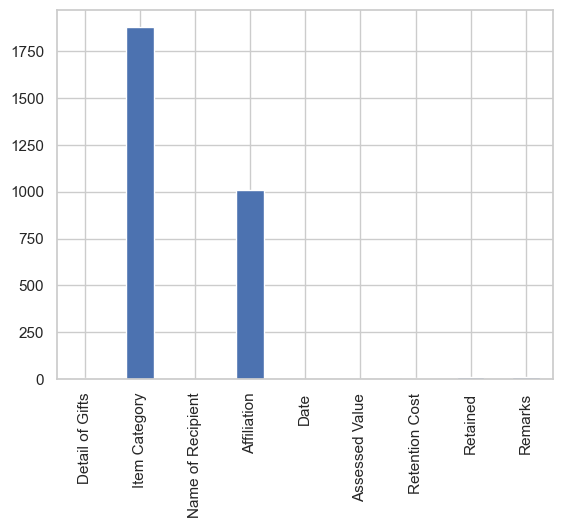

In [245]:
df.isnull().sum().plot(kind='bar')

In [246]:
df['Item Category'].fillna('Not Specified', inplace=True)

In [247]:
df['Affiliation'].fillna('Unknown', inplace=True)

In [248]:
df['Retained'].fillna(df['Retained'].mode()[0], inplace=True)
df['Remarks'].fillna(df['Remarks'].mode()[0], inplace=True)
df['Detail of Gifts'].fillna(df['Detail of Gifts'].mode()[0], inplace=True)
df['Date'].fillna(df['Date'].mode()[0], inplace=True)


In [249]:
df['Assessed Value'].fillna(df['Assessed Value'].mean(), inplace=True)
df['Retention Cost'].fillna(df['Retention Cost'].mean(), inplace=True)

In [250]:
(df.isnull().sum() * 100 / len(df))

Detail of Gifts      0.0
Item Category        0.0
Name of Recipient    0.0
Affiliation          0.0
Date                 0.0
Assessed Value       0.0
Retention Cost       0.0
Retained             0.0
Remarks              0.0
dtype: float64

In [251]:
df['Detail of Gifts'].head(5)

0            Two  small  silver\nBowls
1              One Pilot Pen with\nink
2                      One silver vase
3    One  (decoration)\nfolding Screen
4               One  Decoration\nPiece
Name: Detail of Gifts, dtype: object

In [252]:
df['Detail of Gifts']=df['Detail of Gifts'].str.extract(r'^([A-Za-z -]+)',expand=True)

In [253]:
df['Detail of Gifts'].head(5)

0    Two  small  silver
1    One Pilot Pen with
2       One silver vase
3                 One  
4       One  Decoration
Name: Detail of Gifts, dtype: object

In [254]:
df['Name of Recipient'].head(5)

0    Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...
1    Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...
2               Mr. Shaukat Aziz, Minister for Finance
3    Mr.  Abdul Sattar,  Minister  for  Foreign\nAf...
4    Mr.  Abdul  Sattar,  Minister  for  Foreign\nA...
Name: Name of Recipient, dtype: object

In [255]:
df['Item Category'].value_counts()
# df.tail(20)


Item Category
Not Specified                 1876
Watch                         1102
Decoration Pieces              553
Carpet                         243
Pen                            119
Crockery                       108
Jewellery/Accessories           50
Cigar/Cigarettes                34
Phone                           34
Weapons                         27
Clothes                         26
Bags                            12
Food                            12
Tech                             8
Watch, Weapons                   2
Watch, phone                     1
Technology                       1
Watch, Tech                      1
Clock                            1
Jewellery, Weapons               1
Bag, Jewellery/Accessories       1
Pen, Jewelry                     1
Tech, pen                        1
Name: count, dtype: int64

In [256]:
df.head(5)

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
0,Two small silver,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharrafarraf,2002-01-08,5000.0,0.0,Yes,Yes
1,One Pilot Pen with,Pen,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,2002-01-08,3500.0,0.0,Yes,Yes
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen. Musharraf,2002-01-09,7500.0,0.0,Yes,Yes
3,One,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nAf...",Gen. Musharraf,2002-01-15,2200.0,0.0,Yes,Yes
4,One Decoration,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,2002-01-22,2000.0,0.0,Yes,Yes


### Gift Type Distribution

Analyze which types of gifts are most commonly received. This can help reveal preferences or systemic trends.


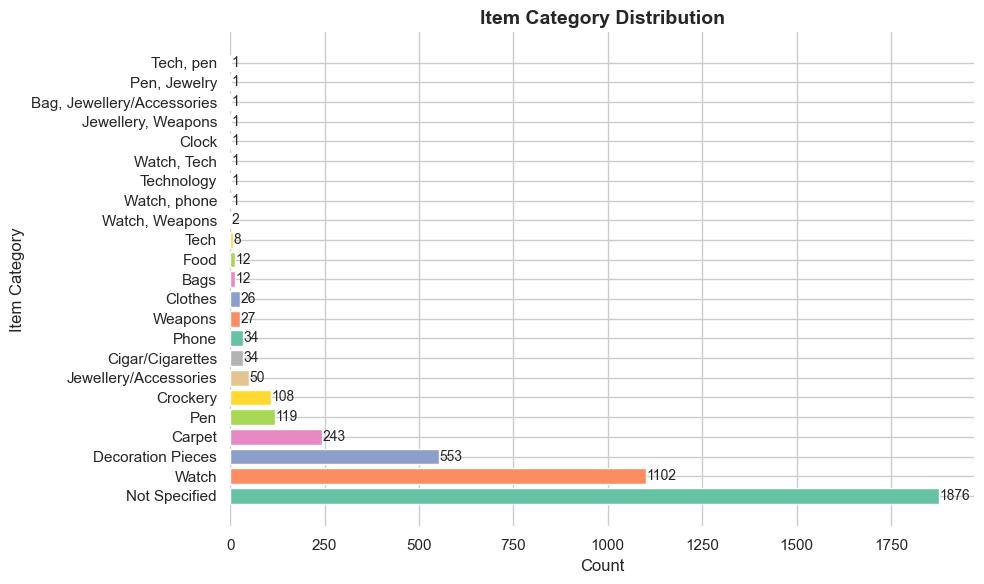

In [257]:
sns.set(style='whitegrid')
colors = sns.color_palette('Set2')

# Get value counts
item_counts = df['Item Category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(item_counts.index, item_counts.values, color=colors)

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=10)

# Title and labels
plt.title('Item Category Distribution', fontsize=14, weight='bold')
plt.xlabel('Count')
plt.ylabel('Item Category')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### Gifts Over Time

Visualize the number of gifts received per year to detect historical trends or spikes in activity.


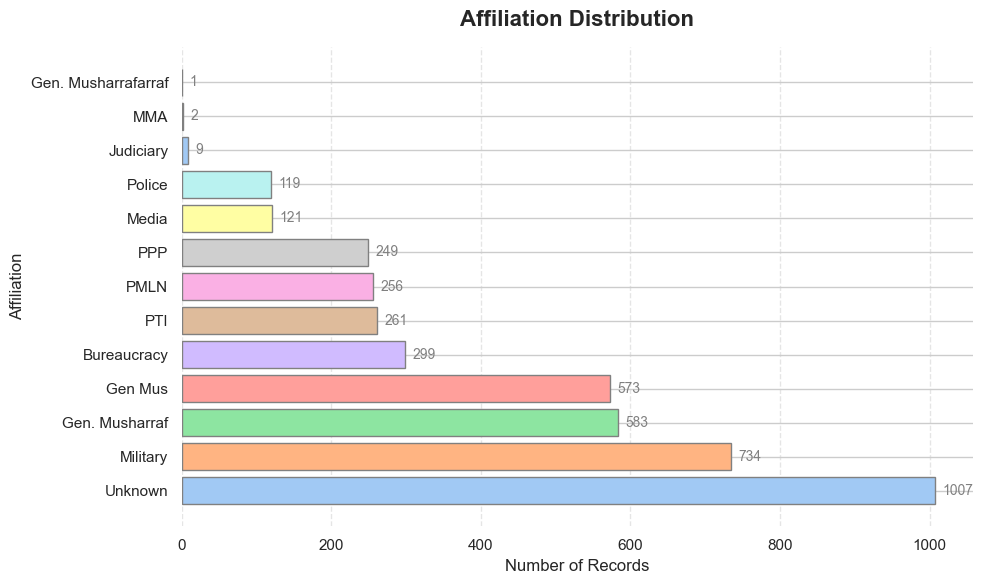

In [258]:
sns.set(style="whitegrid")

# Value counts
affiliation_counts = df['Affiliation'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(affiliation_counts))

bars = plt.barh(
    affiliation_counts.index,
    affiliation_counts.values,
    color=colors,
    edgecolor='gray',  # softer edge for modern feel
    linewidth=1
)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(affiliation_counts.values)*0.01,  # dynamic spacing
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             va='center', fontsize=10, color='gray')

# Title and axis labels
plt.title("Affiliation Distribution", fontsize=16, weight='bold', pad=15)
plt.xlabel("Number of Records", fontsize=12)
plt.ylabel("Affiliation", fontsize=12)

# Improve gridlines and remove unnecessary spines
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)

# Layout
plt.tight_layout()
plt.show()

## Top 5 Assessed Values Distribution

This pie chart displays the distribution of the five most frequent assessed gift values in the Tosha Khana dataset. It highlights which valuation levels appear most commonly and their relative proportions in the data.


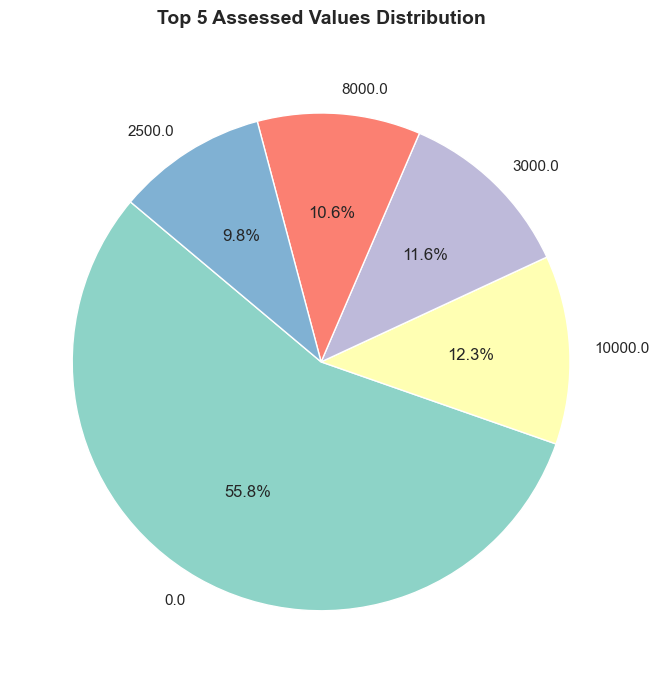

In [259]:
assessed_counts = df['Assessed Value'].value_counts().head(5)

# Colors from a modern palette
colors = sns.color_palette('Set3', n_colors=5)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    assessed_counts,
    labels=assessed_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Title and layout
plt.title("Top 5 Assessed Values Distribution", fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()

## Top 5 Retained Status Counts

This horizontal bar chart shows the frequency of the top 5 values in the `Retained` column. It illustrates how often gifts were retained by officials, returned, or otherwise categorized, offering insight into gift handling practices.


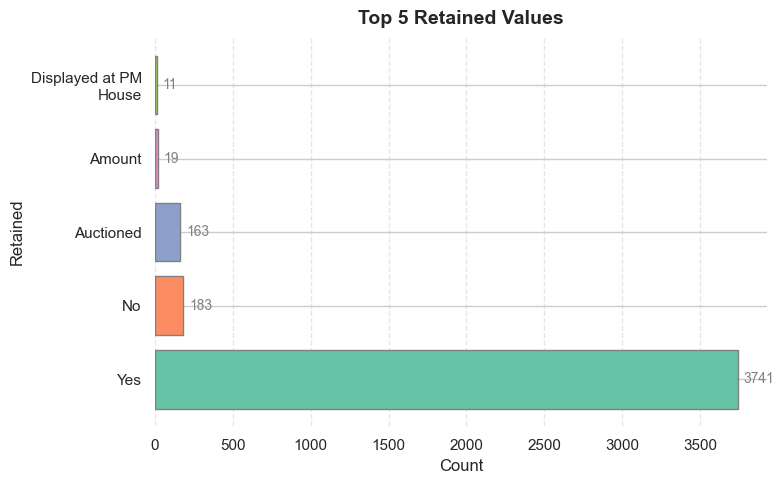

In [260]:
retained_counts = df['Retained'].value_counts().head()

# Set modern theme
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(8, 5))
colors = sns.color_palette("Set2", n_colors=len(retained_counts))

bars = plt.barh(
    retained_counts.index.astype(str),
    retained_counts.values,
    color=colors,
    edgecolor='gray',
    linewidth=1
)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(retained_counts.values)*0.01,
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             va='center', fontsize=10, color='gray')

# Set titles and labels
plt.title("Top 5 Retained Values", fontsize=14, weight='bold', pad=10)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Retained", fontsize=12)

# Improve layout and style
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Show plot
plt.show()


## Total Assessed Value by Affiliation

This horizontal bar chart displays the total assessed value of gifts received by each affiliation. It highlights which affiliations are associated with the highest total value of gifts, offering insight into patterns of gift distribution among various groups.


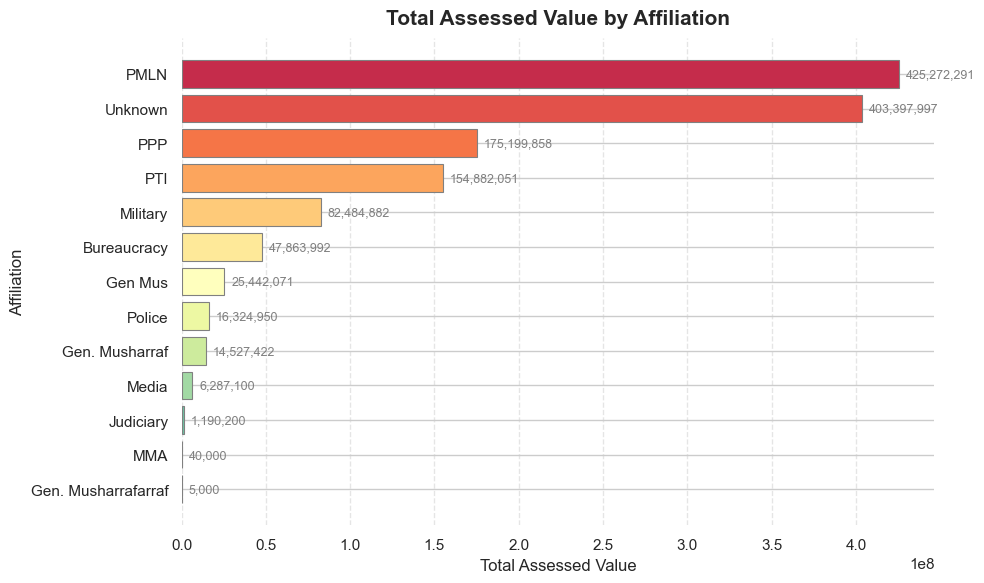

In [261]:
affiliation_totals = df.groupby('Affiliation')['Assessed Value'].sum().sort_values(ascending=False)

# Plot settings
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Spectral", n_colors=len(affiliation_totals))

bars = plt.barh(
    affiliation_totals.index,
    affiliation_totals.values,
    color=colors,
    edgecolor='gray',
    linewidth=0.8
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + affiliation_totals.max() * 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',  # comma as thousand separator
             va='center', fontsize=9, color='gray')

# Reverse y-axis for descending order at top
plt.gca().invert_yaxis()

# Titles and labels
plt.title("Total Assessed Value by Affiliation", fontsize=15, weight='bold', pad=10)
plt.xlabel("Total Assessed Value", fontsize=12)
plt.ylabel("Affiliation", fontsize=12)

# Styling
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

## Top Retained Categories by Total Assessed Value

This horizontal bar chart presents the top 5 retained categories based on the total assessed value of gifts. It reveals which retention outcomes (e.g., retained, returned, deposited) are linked with higher-value gifts, helping to understand the distribution of valuable items.


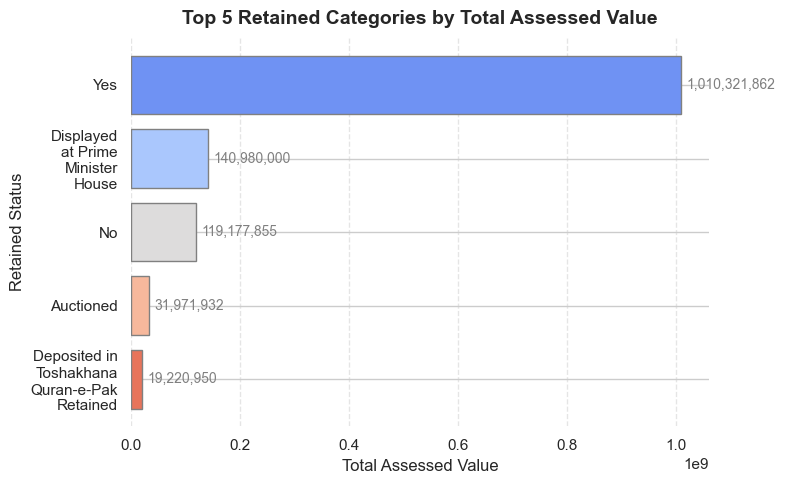

In [262]:
retained_totals = df.groupby('Retained')['Assessed Value'].sum().sort_values(ascending=False).head()

# Plot styling
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
colors = sns.color_palette("coolwarm", n_colors=len(retained_totals))

bars = plt.barh(
    retained_totals.index.astype(str),  # Ensure text labels
    retained_totals.values,
    color=colors,
    edgecolor='gray',
    linewidth=1
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(retained_totals.values) * 0.01,
             bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}',  # Format with commas
             va='center', fontsize=10, color='gray')

# Invert y-axis for better ordering
plt.gca().invert_yaxis()

# Titles and labels
plt.title("Top 5 Retained Categories by Total Assessed Value", fontsize=14, weight='bold', pad=10)
plt.xlabel("Total Assessed Value", fontsize=12)
plt.ylabel("Retained Status", fontsize=12)

# Grid and clean style
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

## Top 5 Item Categories by Total Assessed Value

This chart highlights the item categories that contributed the highest total assessed values among all gifts. It helps identify which types of gifts (e.g., jewelry, watches, artwork) are most valuable in aggregate, offering insights into trends in luxury or high-worth items.


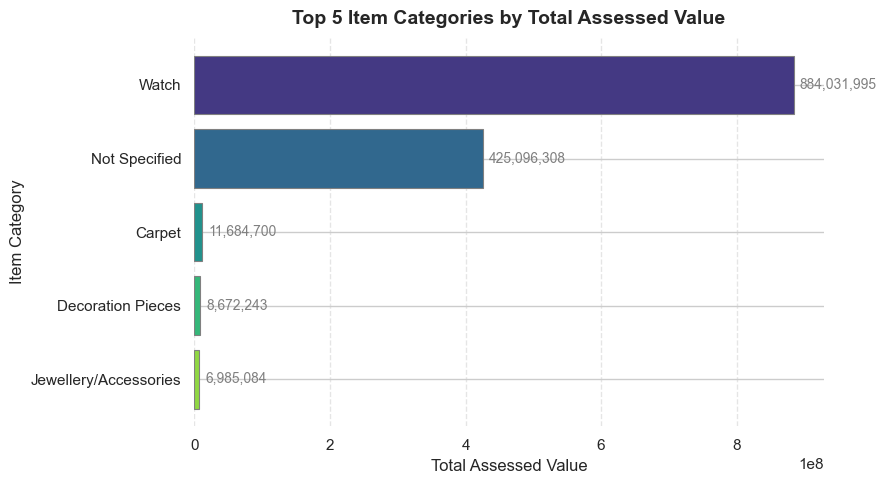

In [263]:
category_totals = df.groupby('Item Category')['Assessed Value'].sum().sort_values(ascending=False).head()

# Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
colors = sns.color_palette("viridis", n_colors=len(category_totals))

bars = plt.barh(
    category_totals.index,
    category_totals.values,
    color=colors,
    edgecolor='gray',
    linewidth=0.8
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(category_totals.values)*0.01,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             va='center', fontsize=10, color='gray')

# Reverse y-axis to show largest on top
plt.gca().invert_yaxis()

# Titles and labels
plt.title("Top 5 Item Categories by Total Assessed Value", fontsize=14, weight='bold', pad=10)
plt.xlabel("Total Assessed Value", fontsize=12)
plt.ylabel("Item Category", fontsize=12)

# Style cleanup
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

## Top 5 Affiliation + Item Category by Total Assessed Value

This horizontal bar chart shows the most valuable combinations of recipient affiliation and item category. By merging both dimensions, it reveals which groups received the most high-value gifts and the types of items involved.


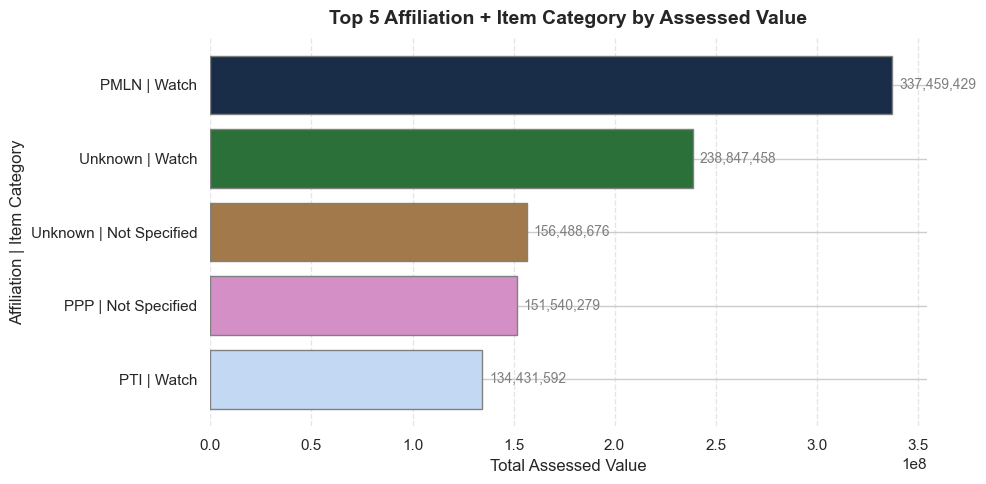

In [264]:
combo_totals = df.groupby(['Affiliation', 'Item Category'])['Assessed Value'].sum().sort_values(ascending=False).head()

# Create readable labels
combo_totals.index = [f"{a} | {c}" for a, c in combo_totals.index]

# Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
colors = sns.color_palette("cubehelix", n_colors=5)

bars = plt.barh(
    combo_totals.index,
    combo_totals.values,
    color=colors,
    edgecolor='gray',
    linewidth=1
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(combo_totals.values)*0.01,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             va='center', fontsize=10, color='gray')

# Reverse y-axis
plt.gca().invert_yaxis()

# Titles and labels
plt.title("Top 5 Affiliation + Item Category by Assessed Value", fontsize=14, weight='bold', pad=10)
plt.xlabel("Total Assessed Value", fontsize=12)
plt.ylabel("Affiliation | Item Category", fontsize=12)

# Style tweaks
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

## Top 5 Affiliation + Item Category by Retention Cost

This chart displays the highest total retention costs across combinations of affiliations and item categories. It highlights which groups paid the most to retain specific types of gifts, offering insight into both the value and interest in personal retention of official gifts.


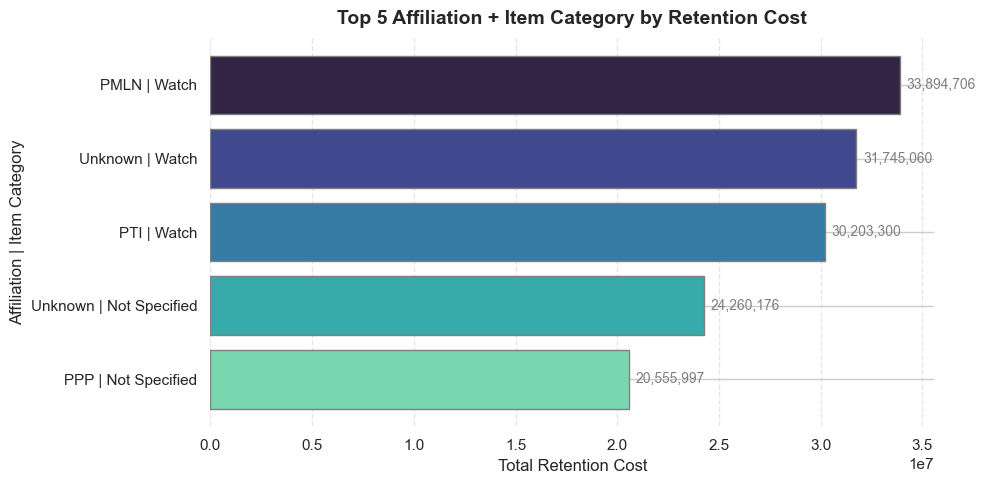

In [265]:

top_retention = df.groupby(['Affiliation', 'Item Category'])['Retention Cost'] \
                  .sum().sort_values(ascending=False).head()

# Convert MultiIndex to readable strings
top_retention.index = [f"{a} | {c}" for a, c in top_retention.index]

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
colors = sns.color_palette("mako", n_colors=5)

# Plot
bars = plt.barh(
    top_retention.index,
    top_retention.values,
    color=colors,
    edgecolor='gray',
    linewidth=1
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(top_retention.values) * 0.01,
             bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}',
             va='center', fontsize=10, color='gray')

# Reverse y-axis
plt.gca().invert_yaxis()

# Title and labels
plt.title("Top 5 Affiliation + Item Category by Retention Cost", fontsize=14, weight='bold', pad=10)
plt.xlabel("Total Retention Cost", fontsize=12)
plt.ylabel("Affiliation | Item Category", fontsize=12)

# Grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()


In [266]:
df.to_csv("Refined_TK_data ver 2.csv", index=False, encoding='utf-8-sig')